## PHAS0029 Session 9: Using the Fast Fourier Transformer for basic functions and Audio Samples ##

## Introduction

For this session we had to convert basic functions like:
$$ f(x) = \begin{cases} 1 & 0 \leq x \le 0.5, \\ 
-1  & 0.5 \leq x < 1, \end{cases} 
$$
and
$$ f(x) = \begin{cases} 1 & 0 \leq x \le 10, \\ 
0  & \text{Otherwise} , \end{cases} 
$$
into Fourier functions after plotting them.

The second part required us to convert 3 sound files into graphs and then into fourier plots so we can calculate the frequency of each one.

In [1]:
#import needed modules
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

### 1. Transformation of basic functions

## Square Wave

In [2]:
#define initial conditions
N = 1000
startx = 0
endx= 1

h = (endx-startx)/N                # size of each step
xpoints = np.arange(startx,endx,h) # evenly spaced x values
sqwave = (-1)**np.round(xpoints)   # values for the square wave 
print(sqwave)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

<IPython.core.display.Javascript object>


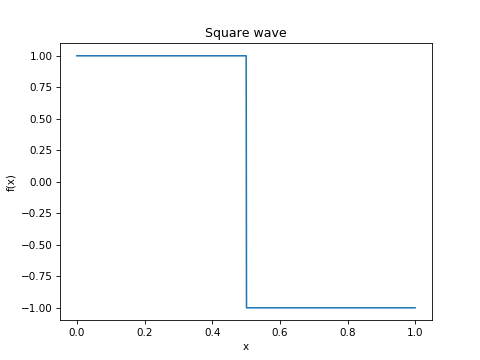

In [3]:
#plots graph
plt.figure()
plt.plot(xpoints,sqwave) 
plt.title("Square wave")
plt.xlabel('x')
plt.ylabel('f(x)');

<IPython.core.display.Javascript object>


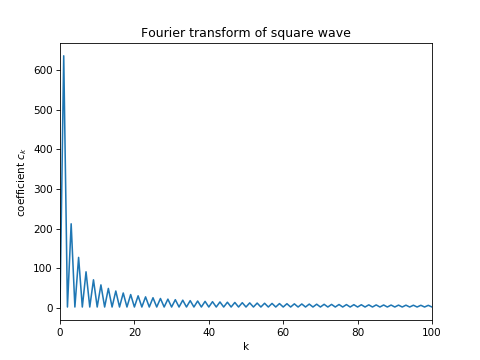

In [4]:
fsqwave = np.fft.rfft(sqwave) # transform the original data into fourier
                      

plt.figure()
plt.xlim(0,100)
plt.plot(abs(fsqwave))   # plot the absolute coefficients to remove imaginary
plt.title("Fourier transform of square wave")
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

## Single Square Pulse

In [5]:
xpoints1 = np.arange(0,1001,1)                   # evenly spaced x values
nxpoints1= np.where(xpoints1 >= 11, xpoints1, 0) # makes all values that are not equal or greater than 11 zero
ssp = (0)**(nxpoints1)                           # values for the single square wave
print(ssp)

[1 1 1 ... 0 0 0]


<IPython.core.display.Javascript object>


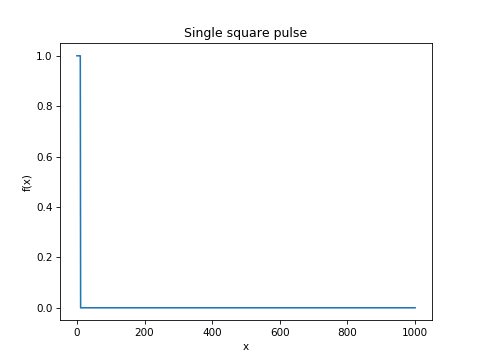

In [6]:
#plots graph
plt.figure()
plt.plot(ssp) 
plt.title("Single square pulse")
plt.xlabel('x')
plt.ylabel('f(x)');

<IPython.core.display.Javascript object>


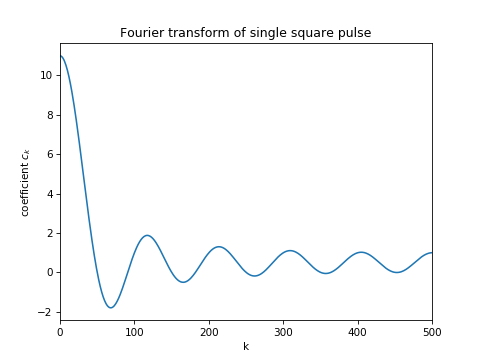

In [7]:
fssp = np.fft.rfft(ssp) # transform the original data into fourier                

plt.figure()
plt.xlim(0,500)
plt.plot(fssp.real)   # plot the real parts of the fourier coefficients 
plt.title("Fourier transform of single square pulse")
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

For the first graph the peak coefficient is in the first 2 k values and rapidly drops to 0 but then rises again but to a lower peak, this trend continues until about k = 60 where the peaks start to level out. A similar thing happend to the single square pulse but much slower so a more curved graph is obtained with more k values (the peak lasts for much longer).  

### 2. Audio samples

## Sample B

<IPython.core.display.Javascript object>


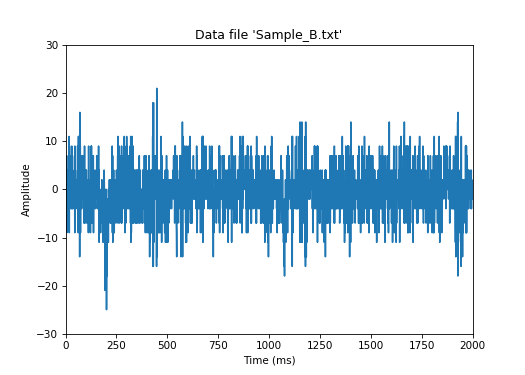

In [8]:
yb = np.loadtxt("Sample_B.txt",float) # import floats from the data file

plt.figure(figsize=(7,5))
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title("Data file 'Sample_B.txt'")
plt.xlim(0,2000)
plt.ylim(-30,30)
plt.plot(yb);

The original plot of the data file is very consistant with the amplitude and it shows no sign of changing.

<IPython.core.display.Javascript object>


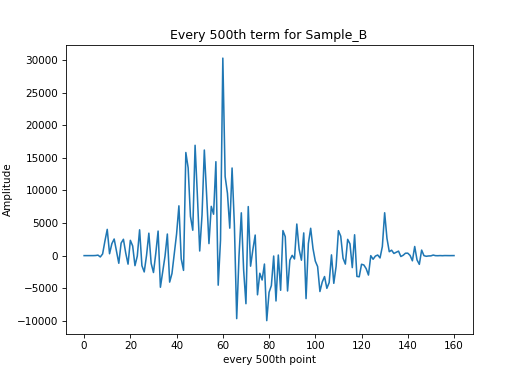

In [9]:
yb1 = yb[::500]

plt.figure(figsize=(7,5))
plt.xlabel('every 500th point') 
plt.ylabel('Amplitude')
plt.title("Every 500th term for Sample_B")
plt.plot(yb1);

This graph represents how the general graph should look but with only about 160 points and as said above the graph is constant for the first 40 (which is 8000) but starts to rise in amplitude reaching a peak of 30000.

We've calculated 40248 Fourier coefficients


<IPython.core.display.Javascript object>


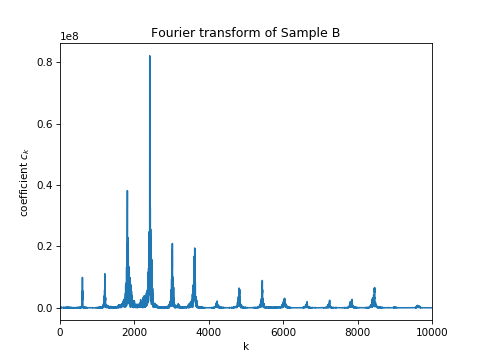

In [10]:
fyb = np.fft.rfft(yb) # transform the original data into fourier                

print("We've calculated", len(fyb), "Fourier coefficients")

plt.figure()
plt.xlim(0,10000)
plt.plot(abs(fyb))   # plot the absolute values of the fourier coefficients 
plt.title("Fourier transform of Sample B")
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

Using the first maximum point the frequency of the sound could be determind at 603.

In [11]:
kb = 603
Nb=len(yb)
V=44100

f=(kb*V)/Nb
print(f)

330.3596496676812


## Sample D

<IPython.core.display.Javascript object>


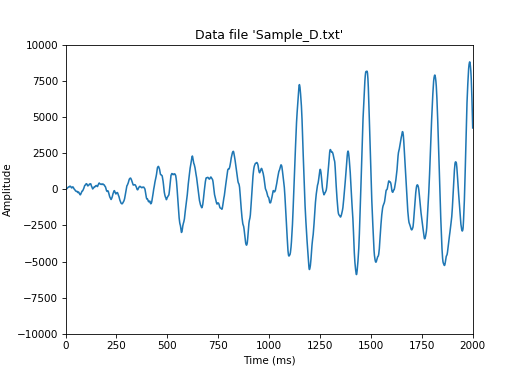

In [12]:
yd = np.loadtxt("Sample_D.txt",float) # import floats from the data file

plt.figure(figsize=(7,5))
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title("Data file 'Sample_D.txt'")
plt.xlim(0,2000)
plt.ylim(-10000,10000)
plt.plot(yd);

The amplitude of this sound increases with time to a maximum of of about 9000.

<IPython.core.display.Javascript object>


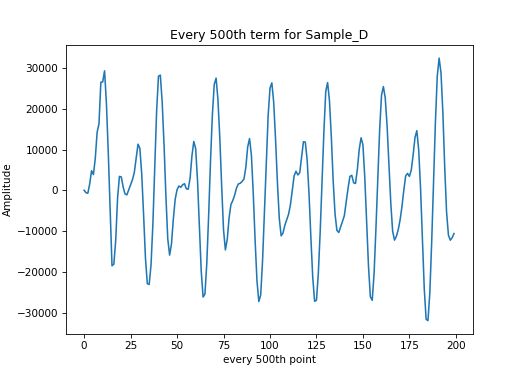

In [13]:
yd1 = yd[::500]

plt.figure(figsize=(7,5))
plt.xlabel('every 500th point') 
plt.ylabel('Amplitude')
plt.title("Every 500th term for Sample_D")
plt.plot(yd1);

This graph shows that the whole sound of sample D is very constant and does not change much thoughout time.

We've calculated 50001 Fourier coefficients


<IPython.core.display.Javascript object>


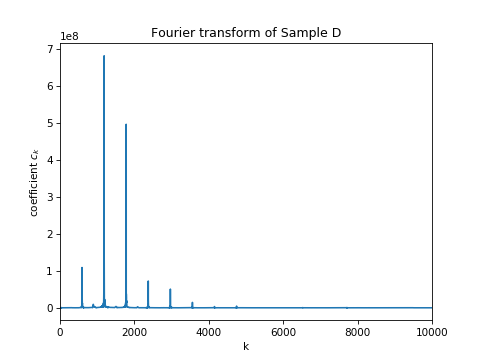

In [14]:
fyd = np.fft.rfft(yd) # transform the original data into fourier      

print("We've calculated", len(fyd), "Fourier coefficients")

plt.figure()
plt.xlim(0,10000)
plt.plot(abs(fyd))   # plot the absolute values of the fourier coefficients 
plt.title("Fourier transform of Sample D")
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

In [15]:
kd = 593
Nd=len(yd)
V=44100

fd=(kd*V)/Nd
print(fd)

261.513


Using the first maximum point the frequency of the sound could be determind at 593.

## Sample G

<IPython.core.display.Javascript object>


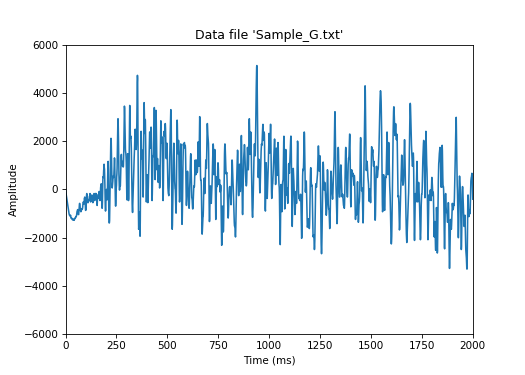

In [16]:
yg = np.loadtxt("Sample_G.txt",float) # import floats from the data file

plt.figure(figsize=(7,5))
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title("Data file 'Sample_G.txt'")
plt.xlim(0,2000)
plt.ylim(-6000,6000)
plt.plot(yg);

Sample Gs amplitude increases and decreases.

<IPython.core.display.Javascript object>


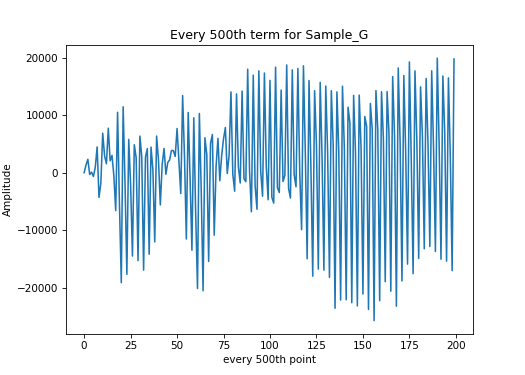

In [17]:
yg1 = yg[::500]

plt.figure(figsize=(7,5))
plt.xlabel('every 500th point') 
plt.ylabel('Amplitude')
plt.title("Every 500th term for Sample_G")
plt.plot(yg1);

Towards the end the amplitude of the sound continuously changes in short intervals of time.

We've calculated 50001 Fourier coefficients


<IPython.core.display.Javascript object>


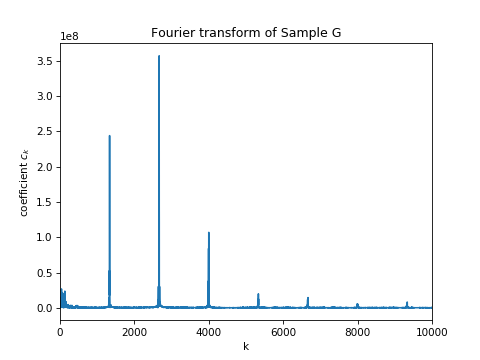

In [18]:
fyg = np.fft.rfft(yg) # transform the original data into fourier        

print("We've calculated", len(fyg), "Fourier coefficients")

plt.figure()
plt.xlim(0,10000)
plt.plot(abs(fyg))   # plot the absolute values of the fourier coefficients 
plt.title("Fourier transform of Sample G")
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

Using the first maximum point the frequency of the sound could be determind at 40.

In [19]:
kg = 40
Ng=len(yg)
V=44100

fg=(kg*V)/Ng
print(fg)

17.64


## Conclusion

All the sounds showed a diffrent pattern but sample B and D had a similar K but different frequency due to the diffrent N and sample G was very diffrent as the first peak was very close to 0.  